# Import Libraries

In [145]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import scale 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import warnings
import math 
from sklearn.metrics import mean_squared_error 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.cluster import KMeans
from heapq import nsmallest,nlargest
from operator import itemgetter
from scipy.stats.mstats import mode
from collections import Counter
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage


# Load Data

In [146]:
X = pd.read_csv('X.csv', index_col=False, header=None)
y = pd.read_csv('y.csv', index_col=False, header=None)
images = pd.read_csv('images.csv', index_col=False, header=None)

In [147]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.463461,9.042592,10.858150,0.000000,5.690516,0.0,0.0,7.226175,0.000000,7.672988,0.000000,0.000000,0.000000,0.000000,8.253795,0.000000,0.190581,0.0,0.00000,0.000000,6.459987,0.106404,0.000000,1.967895,0.00000,0.000000,0.000000,6.968917,0.593034,0.000000,16.514084,0.0,0.0,3.553808,0.000000,2.12966,0.000000,0.0,5.626445,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,6.043025,0.000000,3.857479,0.000000,3.533285,1.703394,0.000000,5.149668,0.000000,5.361672,0.00000,0.000000,5.637078,0.0,1.582911,0.0,11.742784,0.000000,4.416778,0.0,9.681721,4.155226,0.000000,0.0,0.000000,16.038310,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,3.272389,7.198232,0.000000,0.000000,0.0,0.0,3.866530,0.000000,1.638428,0.000000,2.618710,0.000000,4.238891,0.000000,0.000000,5.285543,0.0,0.00000,2.137941,3.367247,0.000000,0.000000,3.463096,0.00000,0.000000,4.761399,3.043028,5.061951,0.118049,10.381834,0.0,0.0,0.443597,7.293412,0.00000,0.341037,0.0,1.578904,0.187543,...,1.930603,0.000000,0.000000,0.0,0.000000,0.000000,0.0,10.308950,0.155801,0.000000,0.000000,1.023362,3.442488,0.000000,0.000000,1.364848,1.487207,0.00000,0.322398,10.713429,0.0,1.500670,0.0,8.115338,3.986903,3.995317,0.0,10.558516,0.000000,0.000000,0.0,0.000000,13.797885,0.0,0.0,2.337896,0.528154,0.0,0.000000,0.000000
2,0.000000,0.632320,3.815153,0.000000,6.290697,0.0,0.0,8.492423,5.379466,2.708441,1.224758,0.000000,0.442913,0.000000,0.205345,0.000000,3.448726,0.0,0.00000,2.946631,1.302244,0.000000,0.000000,2.373710,0.00000,0.000000,2.016903,3.059647,0.000000,1.813111,4.294189,0.0,0.0,2.256104,0.104132,0.00000,0.324014,0.0,2.310654,0.000000,...,0.000000,0.000000,2.151923,0.0,0.000000,0.000000,0.0,5.444514,0.000000,3.809912,4.791812,0.000000,3.927647,0.000000,0.000000,0.000000,2.934495,0.00000,6.322586,2.617958,0.0,0.869363,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.878763,0.0,5.192078,4.009046,0.0,0.0,0.000000,1.315396,0.0,0.000000,0.000000
3,4.122074,1.916136,15.258545,0.000000,0.000000,0.0,0.0,3.151645,0.000000,4.893418,2.262414,3.456539,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.01699,2.049091,0.863130,6.780000,0.000000,0.000000,3.58278,5.131611,0.000000,13.354143,3.725395,0.000000,6.876477,0.0,0.0,7.977012,8.593320,0.00000,7.689942,0.0,0.000000,0.000000,...,2.908790,0.523326,0.000000,0.0,0.000000,1.348014,0.0,2.064437,0.000000,4.339351,8.202600,0.000000,0.000000,9.635072,0.000000,0.000000,0.000000,7.64882,0.000000,0.744317,0.0,0.000000,0.0,13.746383,0.000000,3.625509,0.0,6.952682,0.000000,8.933246,0.0,0.532675,7.789596,0.0,0.0,9.794974,0.000000,0.0,16.635849,0.000000
4,0.000000,0.000000,3.467616,3.487184,0.000000,0.0,0.0,0.000000,8.399324,7.640605,4.336277,1.938254,10.163528,0.000000,0.000000,2.112941,8.175286,0.0,0.00000,0.596409,1.155638,0.020291,2.596354,4.641885,0.15217,0.000000,0.000000,7.726577,2.610856,0.000000,8.002879,0.0,0.0,0.667134,4.222018,0.00000,5.747911,0.0,0.000000,0.000000,...,2.693504,0.000000,0.000000,0.0,1.177905,0.000000,0.0,0.885076,0.000000,1.709938,1.773151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.295005,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.017862,0.0,1.231571,0.000000,0.000000,0.0,8.419696,0.000000,0.0,0.0,2.484975,0.056908,0.0,0.000000,4.494574


In [148]:
X_train=X.values
y_train=y.values
img_train=images.values

In [7]:
# standardize the data
scaler = StandardScaler().fit(X_train)

X_train_s = scaler.transform(X_train)
#X_test_s = scaler.transform(X_test)

In [8]:
X_train.shape

(10000, 128)

In [ ]:
labels = ['plane','car','bird','horse','ship']

In [9]:
def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(32,32,3) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

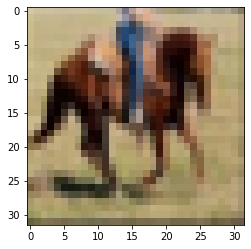

In [10]:
plt.imshow(img_train[0].reshape(32,32,3))

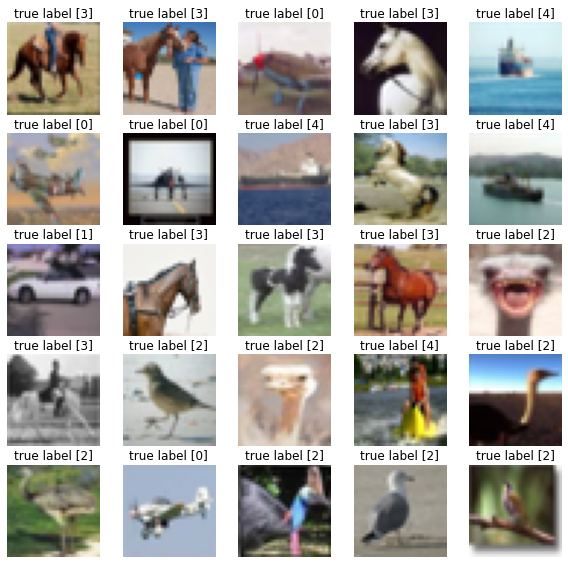

In [11]:
plt.figure(figsize = (10,20))
for i in range(0,25) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(img_train[i].reshape(32,32,3))
    plt.title("true label {}".format(y_train[i]))
    #showImage(X_train[i])
  

In [ ]:
classes = ['c0','c1', 'c2', 'c3', 'c4']

Text(0.5, 1.0, 'class distribution')

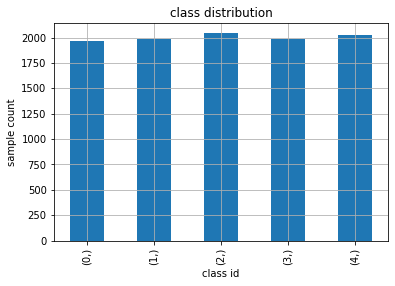

In [12]:
# check the classes distribution
y.value_counts(sort=False).plot(kind='bar')
plt.grid()
plt.xlabel('class id')
plt.ylabel('sample count')
plt.title('class distribution')

# Problem 1

### Find the optimal number of clusters by using within-cluster SSE

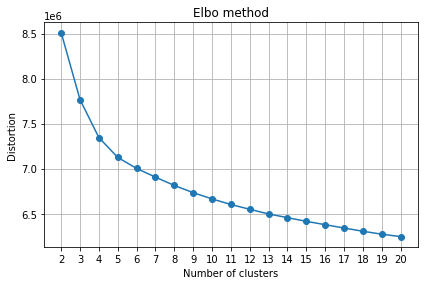

In [149]:
# Using elbow
from sklearn.cluster import KMeans
distortions = [ ]
for i in range(2, 21):
  km = KMeans(n_clusters=i, init='k-means++',  n_init=10, max_iter=300,  random_state=0)
  km.fit(X_train)
  distortions.append(km.inertia_)
plt.plot(range(2, 21), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.xticks(np.arange(2,21, step = 1.0))
plt.tight_layout()
plt.grid()
plt.title('Elbo method')
plt.show()

I can see from this elbo plot that SSE decrease significanilt when $k \in {4,5}$ then I will consider those candidates for optimal clustering and I will observe the silhouette plot for both of them

Mean Silhouette coefficient 0.09987021552564934


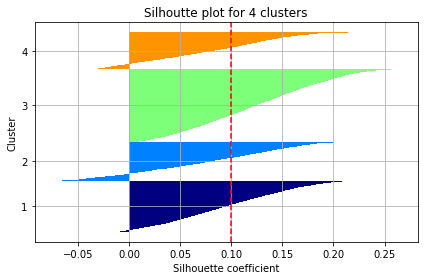

Mean Silhouette coefficient 0.08243371102253667


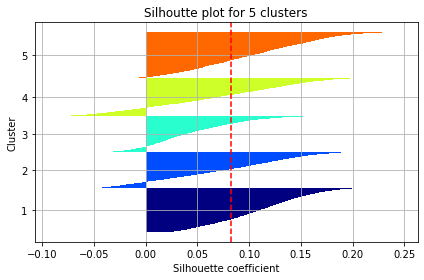

Mean Silhouette coefficient 0.07689787900822961


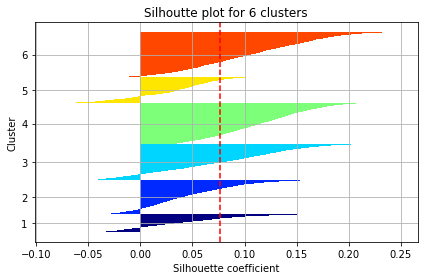

In [151]:
# Generate silhoutte plots for different ks and chose best K
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans

for k in range(4,7):
  km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
  y_km = km.fit_predict(X_train)
  cluster_labels = np.unique(y_km)
  n_clusters = cluster_labels.shape[0]
  silhouette_vals = silhouette_samples(X_train,y_km,metric='euclidean')
  y_ax_lower, y_ax_upper = 0,0
  yticks = []
  for i, c in enumerate(cluster_labels):
      c_silhouette_vals = silhouette_vals[y_km == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(float(i) / n_clusters)
      plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals, height=1.0,edgecolor='none', color=color)
      yticks.append((y_ax_lower+y_ax_upper)/2.)
      y_ax_lower += len(c_silhouette_vals)
  silhouette_avg = np.mean(silhouette_vals)
  print("Mean Silhouette coefficient {}".format(silhouette_avg))
  plt.axvline (silhouette_avg, color="red",linestyle="--")
  plt.yticks(yticks, cluster_labels + 1)
  plt.ylabel('Cluster')
  plt.xlabel('Silhouette coefficient')
  plt.title ('Silhoutte plot for {} clusters'.format(k))
  plt.tight_layout()
  plt.grid()
  plt.show()

#### Choose $k=5$

In [152]:
# run kmeans
num_clusters = 5

Although with $k=4$ we get mean siluatte score > 0.05 but I choose $k=5$ since the clusters are more even (So the samples distribution among the clustets is almost uniform.

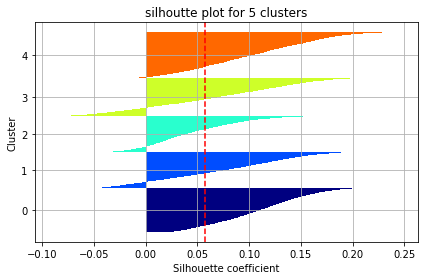

In [202]:
km = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X_train)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_train,y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals, height=1.0,edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
k_silhouette_avg = np.mean(silhouette_vals)
plt.axvline (silhouette_avg, color="red",linestyle="--")
plt.yticks(yticks, cluster_labels)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title ('silhoutte plot for {} clusters'.format(num_clusters))
plt.tight_layout()
plt.grid()
plt.show()

In [203]:
k_silhouette_avg

0.08243371102253667

### Identify 2 samples that are at the boundary of any two clusters

Indicies in cluster 0 with smallest silhouette score [3750, 8689] 
Indicies in cluster 1 with smallest silhouette score [1734, 6095] 
Indicies in cluster 2 with smallest silhouette score [7528, 425] 
Indicies in cluster 3 with smallest silhouette score [1371, 8292] 
Indicies in cluster 4 with smallest silhouette score [1033, 6114] 


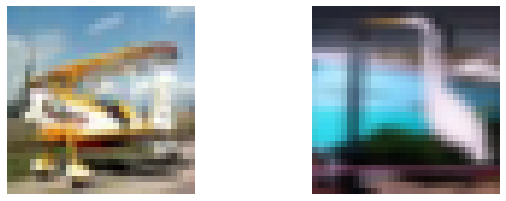

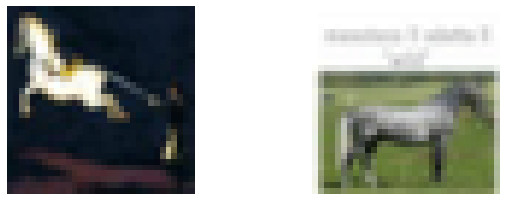

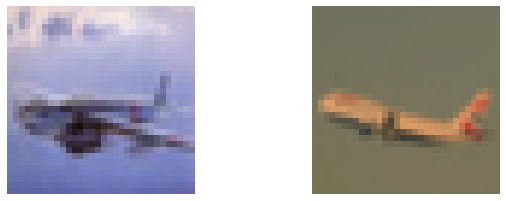

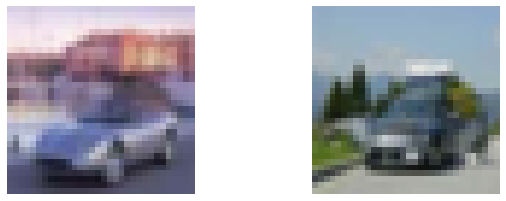

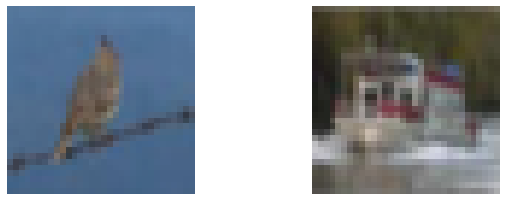

In [154]:
for i, c in enumerate(cluster_labels):
  #c_silhouette_vals = silhouette_vals[y_km == c]
  result = nsmallest(2, enumerate(silhouette_vals[y_km == c]), itemgetter(1))
  ind = []
  #c_silhouette_vals = silhouette_vals[y_km == c]
  #ind = np.argpartition(silhouette_vals[y_km == c],2)[:2]
  for j in range(len(result)):
    index_pos = np.where (silhouette_vals ==result[j][1])
    #print(index_pos[0])
    ind.append(index_pos[0][0])
  #ind2=silhouette_vals[y_km == c].argsort()[-4:][::-1]
  #print(ind)
  print("Indicies in cluster %d with smallest silhouette score %s " %(c,ind))
  plt.figure(figsize = (10,20))

  for k in range(len(ind)) :
    plt.subplot(5,2,k+1)
    plt.axis('off')
    plt.imshow(img_train[ind[k]].reshape(32,32,3))
    #plt.title("cluster {}"  .format(c))
  

### Identify 5 samples that are at the core of each cluster

Indicies in cluster 0 with largest silhouette score [4013, 7521, 2609, 6306, 1224] 
Indicies in cluster 1 with largest silhouette score [3337, 4989, 7673, 8528, 8143] 
Indicies in cluster 2 with largest silhouette score [1685, 2222, 3818, 4849, 8002] 
Indicies in cluster 3 with largest silhouette score [9953, 6340, 2449, 3856, 2899] 
Indicies in cluster 4 with largest silhouette score [7353, 56, 1803, 6819, 5964] 


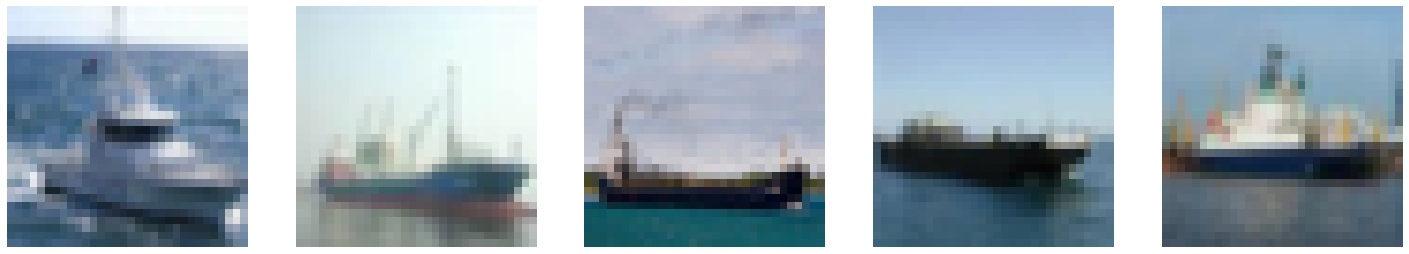

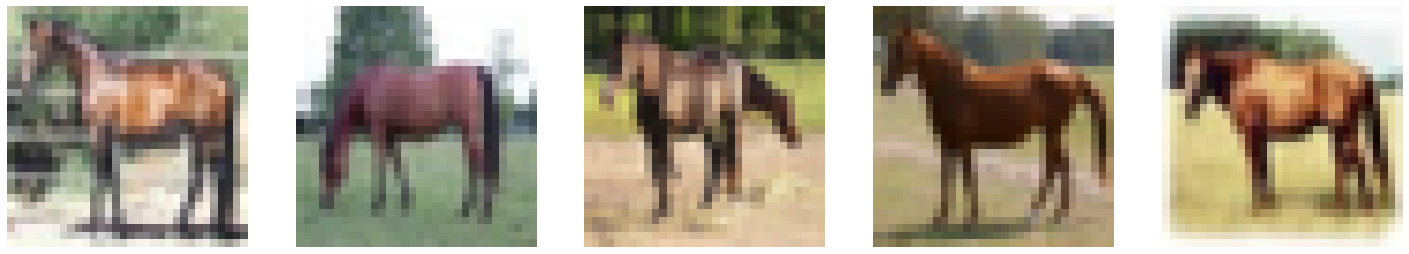

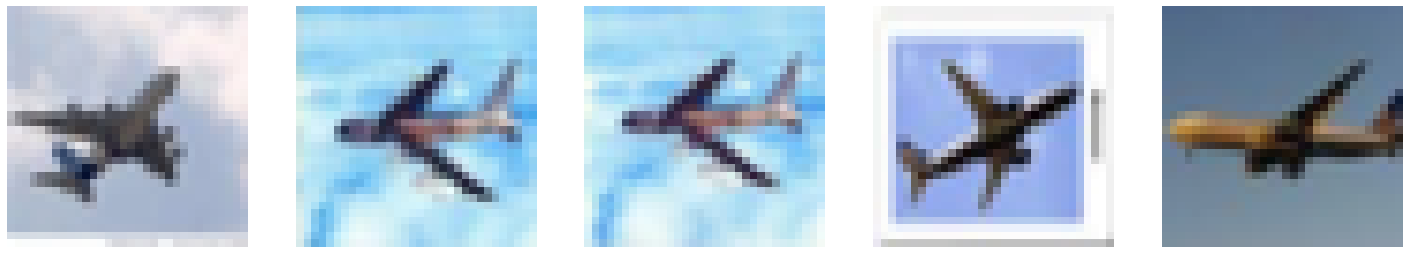

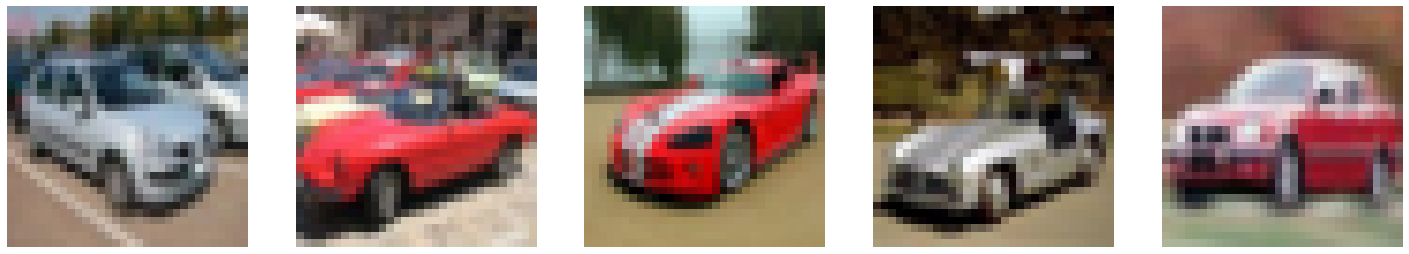

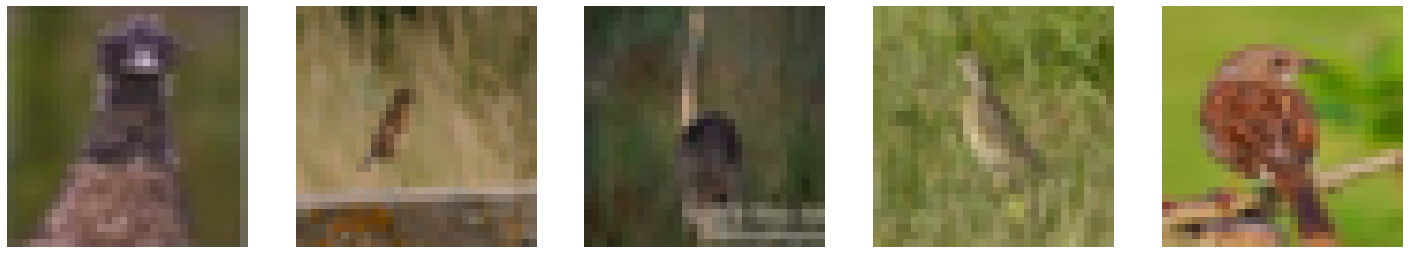

In [155]:
for i, c in enumerate(cluster_labels):
  #c_silhouette_vals = silhouette_vals[y_km == c]
  result = nlargest(5, enumerate(silhouette_vals[y_km == c]), itemgetter(1))
  ind = []
  #c_silhouette_vals = silhouette_vals[y_km == c]
  #ind = np.argpartition(silhouette_vals[y_km == c],2)[:2]
  for i in range(len(result)):
    index_pos = np.where (silhouette_vals ==result[i][1])
    #print(result[i][1])
    ind.append(index_pos[0][0])
  #ind2=silhouette_vals[y_km == c].argsort()[-4:][::-1]
  #print(ind)
  print("Indicies in cluster %d with largest silhouette score %s " %(c,ind))
  plt.figure(figsize = (25,50))

  for k in range(len(ind)) :
    plt.subplot(4,5,k+1)
    plt.axis('off')
    plt.imshow(img_train[ind[k]].reshape(32,32,3))
    #plt.title("cluster {} , label {} ".format(c,y_train[ind[k]]))
  
  



### Inter-distance betwwen clusters

The inter-cluster distance d(i,j) between two clusters may be any number of distance measures, such as the distance between the centroids of the clusters. 

In [45]:
from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(km.cluster_centers_)

In [47]:
tri_dists = dists[np.triu_indices(5, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()

In [49]:
dists

array([[0.        , 6.73209829, 8.41397346, 7.5936534 , 9.45782426],
       [6.73209829, 0.        , 6.72858157, 4.534456  , 9.19200067],
       [8.41397346, 6.72858157, 0.        , 5.8648542 , 6.03751544],
       [7.5936534 , 4.534456  , 5.8648542 , 0.        , 8.49248712],
       [9.45782426, 9.19200067, 6.03751544, 8.49248712, 0.        ]])

In [48]:
min_dist

4.534455998317891

# Problem 2

## Ward method

In [179]:
aggw = AgglomerativeClustering(affinity='euclidean', linkage='ward',n_clusters=4)
y_aggw=aggw.fit_predict(X_train)

In [72]:
aggw.labels_

array([1, 1, 0, ..., 0, 1, 0])

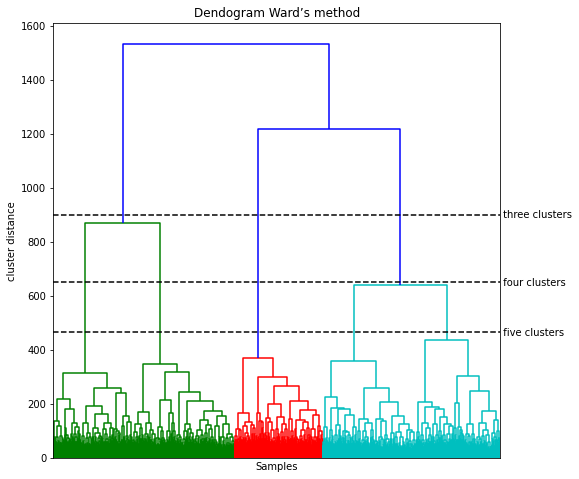

In [178]:
plt.figure(figsize=(8, 8))
dend = shc.dendrogram(shc.linkage(X_train, method='ward'),no_labels=True)
#mark cuts in the tree that signify 3,4,5 clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [465,465], '--', c='k')
ax.plot(bounds, [650,650], '--', c='k')
ax.plot(bounds, [900,900], '--', c='k')
ax.text(bounds[1], 900 , ' three clusters', va='center', fontdict={'size':10})
ax.text(bounds[1], 650 , ' four clusters', va='center', fontdict={'size':10})
ax.text(bounds[1], 465 , ' five clusters', va='center', fontdict={'size':10})
plt.xlabel('Samples')
plt.ylabel('cluster distance')
plt.title("Dendogram Ward’s method")
plt.show()

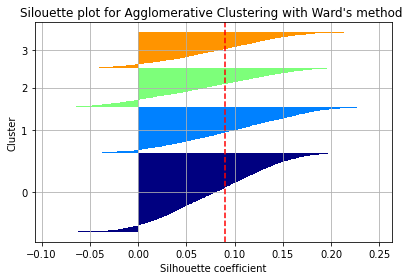

In [180]:
agg_cluster_labels = np.unique(y_aggw)
n_clusters = agg_cluster_labels.shape[0]
agg_silhouette_vals = silhouette_samples(X_train,y_aggw,metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i, c in enumerate(agg_cluster_labels):
    c_silhouette_vals = silhouette_vals[y_aggw == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals, height=1.0,edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
agg_silhouette_avg = np.mean(agg_silhouette_vals)
plt.axvline (agg_silhouette_avg, color="red",linestyle="--")
plt.yticks(yticks, agg_cluster_labels)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title("Silouette plot for Agglomerative Clustering with Ward's method ")
plt.tight_layout()
plt.grid()
plt.show()

In [197]:
agg_silhouette_avg

0.08998814675212881

In [181]:
silhouette_scores = [] 
for k in range(2,7):
  agg = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
  assignment=agg.fit_predict(X_train)
  silhouette_scores.append(silhouette_score(X_train,assignment))

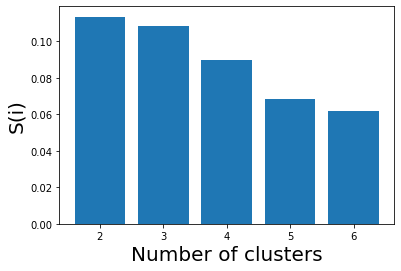

In [182]:
# Plotting a bar graph to compare the results 
k=range(2,7)
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

In [183]:
agg_cluster_labels = np.unique(aggw.labels_)
agg_cluster_labels

array([0, 1, 2, 3])

Indicies in cluster 0 with smallest silhouette score [6875, 6612] 
Indicies in cluster 1 with smallest silhouette score [8210, 2550] 
Indicies in cluster 2 with smallest silhouette score [218, 8792] 
Indicies in cluster 3 with smallest silhouette score [7982, 2791] 


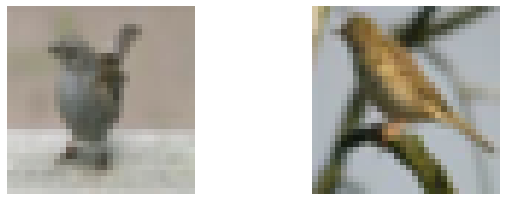

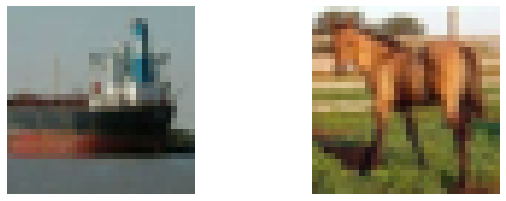

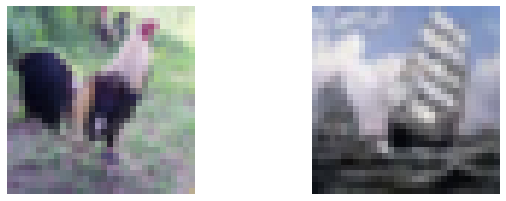

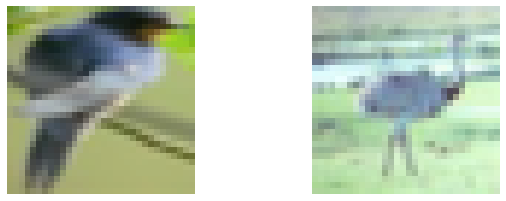

In [185]:
for i, c in enumerate(agg_cluster_labels):
  #c_silhouette_vals = silhouette_vals[y_km == c]
  result = nsmallest(2, enumerate(agg_silhouette_vals[y_aggw == c]), itemgetter(1))
  ind = []
  #c_silhouette_vals = silhouette_vals[y_km == c]
  #ind = np.argpartition(silhouette_vals[y_km == c],2)[:2]
  for j in range(len(result)):
    index_pos = np.where (agg_silhouette_vals ==result[j][1])
    #print(index_pos[0])
    ind.append(index_pos[0][0])
  print("Indicies in cluster %d with smallest silhouette score %s " %(c,ind))
  plt.figure(figsize = (10,20))

  for k in range(len(ind)) :
    plt.subplot(5,2,k+1)
    plt.axis('off')
    plt.imshow(img_train[ind[k]].reshape(32,32,3))

Indicies in cluster 0 with largest silhouette score [7522, 6698, 2950, 4655, 9021] 
Indicies in cluster 1 with largest silhouette score [7353, 1803, 8675, 56, 9258] 
Indicies in cluster 2 with largest silhouette score [9953, 6340, 2449, 3894, 461] 
Indicies in cluster 3 with largest silhouette score [4989, 3337, 1506, 9071, 8528] 


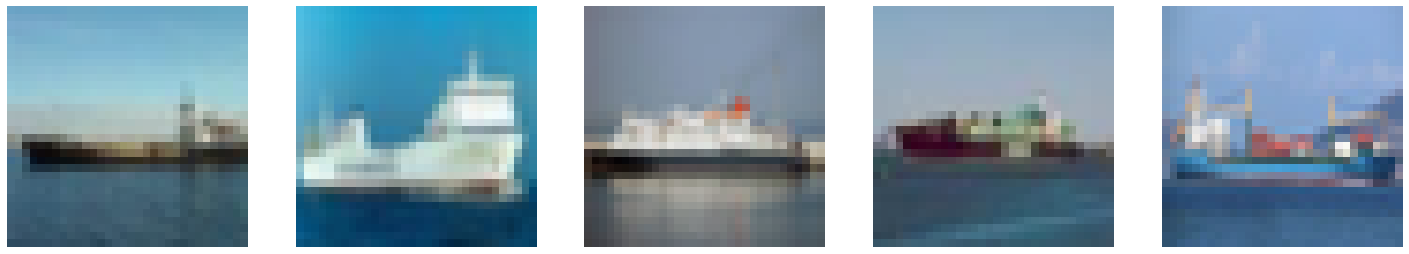

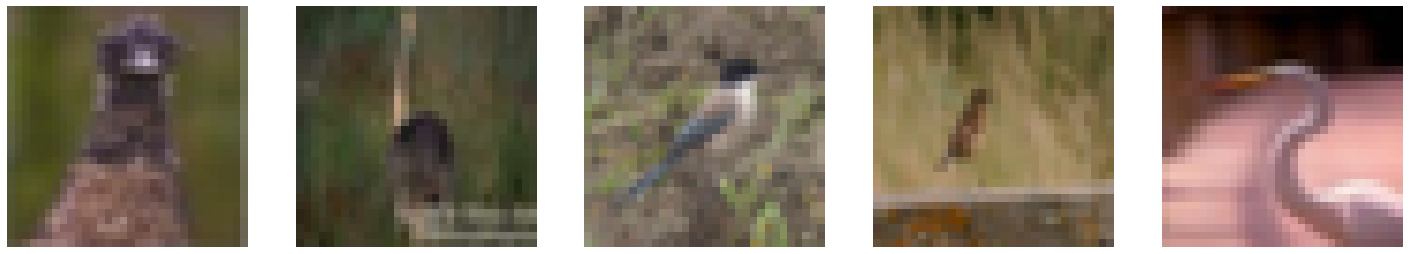

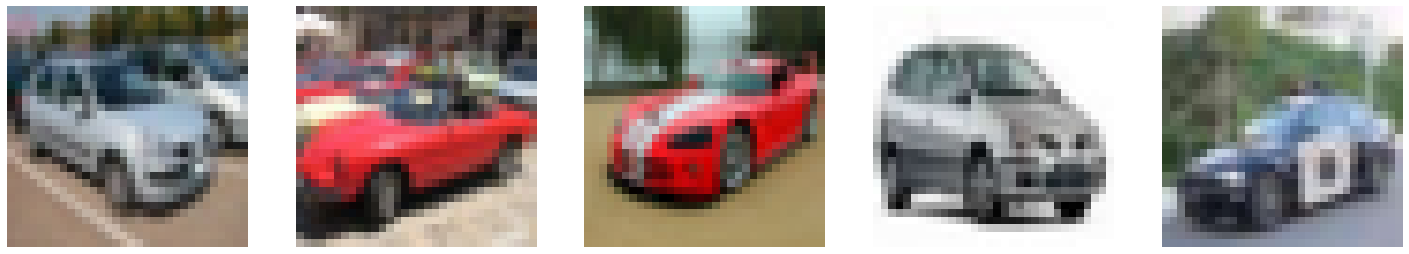

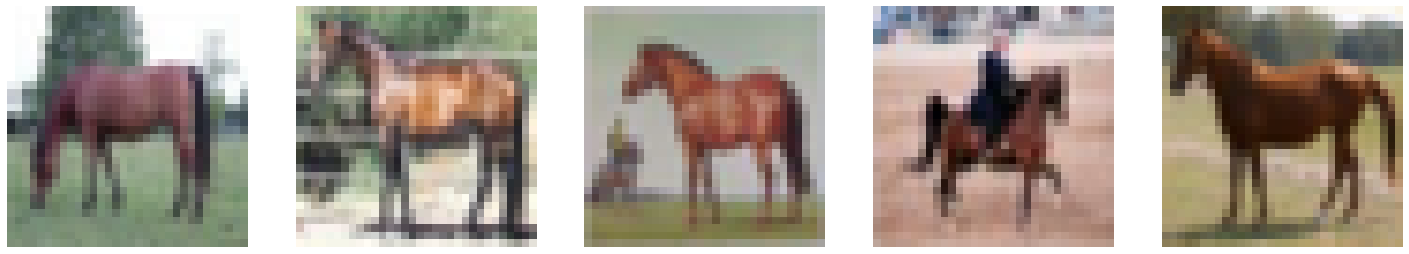

In [187]:
for i, c in enumerate(agg_cluster_labels):
  result = nlargest(5, enumerate(agg_silhouette_vals[y_aggw == c]), itemgetter(1))
  ind = []
  for i in range(len(result)):
    index_pos = np.where (agg_silhouette_vals ==result[i][1])
    #print(result[i][1])
    ind.append(index_pos[0][0])
  #ind2=silhouette_vals[y_km == c].argsort()[-4:][::-1]
  #print(ind)
  print("Indicies in cluster %d with largest silhouette score %s " %(c,ind))
  plt.figure(figsize = (25,50))

  for k in range(len(ind)) :
    plt.subplot(4,5,k+1)
    plt.axis('off')
    plt.imshow(img_train[ind[k]].reshape(32,32,3))

## Single link method

In [101]:
aggs = AgglomerativeClustering(affinity='euclidean', linkage='single',n_clusters=5)
y_aggs=aggs.fit_predict(X_train)

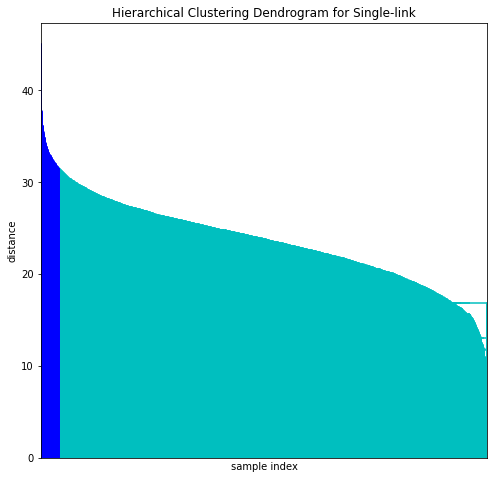

In [190]:
hc_complete = linkage(X_train, "complete")
hc_single = linkage(X_train, "single")

# calculate full dendrogram
plt.figure(figsize=(8, 8))
plt.title('Hierarchical Clustering Dendrogram for Single-link')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_single,
    no_labels=True
)
plt.show()

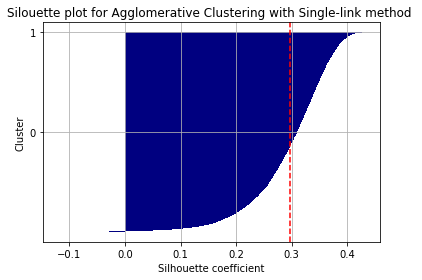

In [191]:
agg_s = AgglomerativeClustering( affinity='euclidean', linkage='single')
y_agg_s=agg_s.fit_predict(X_train)
cluster_labels = np.unique(y_agg_s)
n_clusters = cluster_labels.shape[0]
agg_s_silhouette_vals = silhouette_samples(X_train,y_agg_s,metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = agg_s_silhouette_vals[y_agg_s == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals, height=1.0,edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(agg_s_silhouette_vals)
plt.axvline (silhouette_avg, color="red",linestyle="--")
plt.yticks(yticks, cluster_labels)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title("Silouette plot for Agglomerative Clustering with Single-link method ")
plt.tight_layout()
plt.grid()
plt.show()

In [198]:
np.mean(agg_s_silhouette_vals)


0.297589992883273

In [121]:
np.sum([y_agg_s == 0])

9999

## Complete link

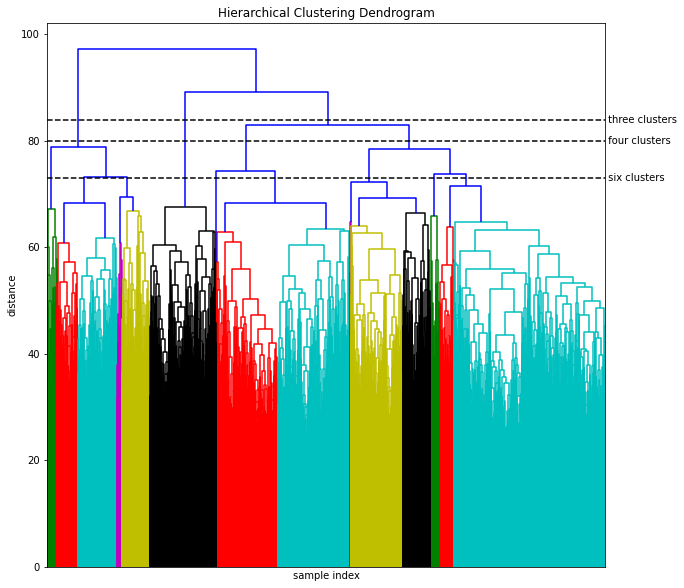

In [209]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

hc_complete = linkage(X_train, "complete")
hc_average = linkage(X_train, "average")
hc_single = linkage(X_train, "single")

# calculate full dendrogram
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    no_labels=True
)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [84,84], '--', c='k')
ax.text(bounds[1], 84 , ' three clusters', va='center', fontdict={'size':10})
ax.plot(bounds, [80,80], '--', c='k')
ax.text(bounds[1], 80 , ' four clusters', va='center', fontdict={'size':10})
ax.plot(bounds, [73,73], '--', c='k')
ax.text(bounds[1], 73 , ' six clusters', va='center', fontdict={'size':10})
plt.show()

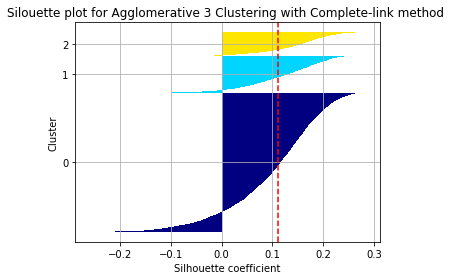

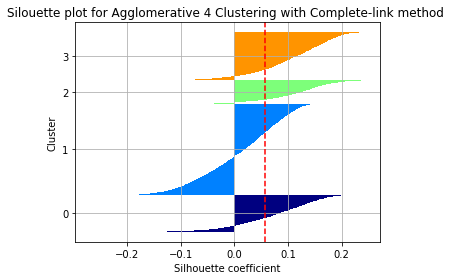

In [196]:
for j in [3,4]:
  agg_c = AgglomerativeClustering(n_clusters=j, affinity='euclidean', linkage='complete')
  y_agg_c=agg_c.fit_predict(X_train)
  cluster_labels = np.unique(y_agg_c)
  n_clusters = cluster_labels.shape[0]
  agg_c_silhouette_vals = silhouette_samples(X_train,y_agg_c,metric='euclidean')
  y_ax_lower, y_ax_upper = 0,0
  yticks = []
  for i, c in enumerate(cluster_labels):
      c_silhouette_vals = agg_c_silhouette_vals[y_agg_c == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(float(i) / n_clusters)
      plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals, height=1.0,edgecolor='none', color=color)
      yticks.append((y_ax_lower+y_ax_upper)/2.)
      y_ax_lower += len(c_silhouette_vals)
  silhouette_avg = np.mean(agg_c_silhouette_vals)
  plt.axvline (silhouette_avg, color="red",linestyle="--")
  plt.yticks(yticks, cluster_labels)
  plt.ylabel('Cluster')
  plt.xlabel('Silhouette coefficient')
  plt.title("Silouette plot for Agglomerative {} Clustering with Complete-link method ".format(j))
  plt.tight_layout()
  plt.grid()
  plt.show()


In [199]:
np.mean(agg_c_silhouette_vals)

0.05726857242397766

## Adjusted Rand index

In [200]:
clusterer = KMeans(n_clusters=5, init='k-means++', n_init=20, max_iter=300, tol=1e-04, random_state=0)
cluster_labels = clusterer.fit_predict(X_train)
adjusted_rand_score(y_train.ravel(),cluster_labels)

0.7698505511150026

In [201]:
clusterer = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_labels = clusterer.fit_predict(X_train)
adjusted_rand_score(y_train.ravel(),cluster_labels)

0.5661144023408701

In [140]:
clusterer = AgglomerativeClustering(affinity='euclidean', linkage='single')
cluster_labels = clusterer.fit_predict(X_train)
adjusted_rand_score(y_train.ravel(),cluster_labels)

1.7198317830010076e-06

In [144]:
clusterer = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
cluster_labels = clusterer.fit_predict(X_train)
adjusted_rand_score(y_train.ravel(),cluster_labels)

0.3878045930472607